In [ ]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
import os
sys.path.append('/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data')
os.chdir('/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data')

In [ ]:
df=pd.read_csv('data.csv',encoding='latin1')
df.columns=[i.lower() for i in pd.read_csv('data.csv',nrows=0).columns]

df.loc[:,'invoicedate']=pd.to_datetime(df.invoicedate)

df.loc[:,'year_month']=df.invoicedate.dt.to_period('M')
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


## Demand based selection

In [ ]:
df.loc[:,'quantity']=df.loc[:,'quantity'].abs()
df.loc[:,'unitprice']=df.loc[:,'unitprice'].apply(lambda x: max(0,x))


grp_cols=['description','year_month']


df_q=df.groupby(grp_cols)[['quantity']].sum().unstack()['quantity']
df_q.loc[:,'ct_q']=df_q.notna().sum(axis=1)

df_q.loc[:,'sum_q']=df_q.sum(axis=1)


df_q.sort_values(by=['ct_q','sum_q'],ascending=False) # We wil try to analyse those producst that have demand across all months

year_month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,ct_q,sum_q
description,,,,,,,,,,,,,,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,5195.0,1492.0,3518.0,3888.0,10335.0,6005.0,2122.0,3810.0,2261.0,3515.0,8180.0,4559.0,1367.0,13,56260.0
JUMBO BAG RED RETROSPOT,2178.0,2855.0,3082.0,5283.0,2460.0,3625.0,3688.0,3132.0,5603.0,4535.0,6021.0,6011.0,1120.0,13,49606.0
WHITE HANGING HEART T-LIGHT HOLDER,4399.0,5552.0,1880.0,2016.0,5779.0,4051.0,1699.0,3035.0,2104.0,2525.0,1704.0,4950.0,779.0,13,40486.0
PACK OF 72 RETROSPOT CAKE CASES,4136.0,3413.0,2095.0,3975.0,3068.0,3465.0,2008.0,2832.0,3014.0,3574.0,2135.0,2625.0,459.0,13,36812.0
ASSORTED COLOUR BIRD ORNAMENT,2371.0,1771.0,1667.0,2675.0,2560.0,3061.0,1588.0,1846.0,6554.0,3080.0,2784.0,5254.0,1330.0,13,36554.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VINTAGE BEAD PINK JEWEL STAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1,2.0
WATERING CAN SINGLE HOOK PISTACHIO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0
WIRE FLOWER T-LIGHT HOLDER,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0


In [ ]:
df_quantity_final=df_q[df_q.ct_q==13]#There are 1209 products that have sold for all the months over an year time
t50_quantityBasedProducts=list(df_quantity_final.sort_values('sum_q',ascending=False)[:5].index)


## PRice based selection

In [ ]:
df_p=df.groupby(grp_cols)[['unitprice']].mean().unstack()['unitprice']
df_p.loc[:,'ct_price']=df_p.notna().sum(axis=1)

df_p.loc[:,'mean_price']=df_p.mean(axis=1)


df_p.sort_values(by=['ct_price','mean_price'],ascending=False) # We wil try to analyse those products which has average price across all the year

year_month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,ct_price,mean_price
description,,,,,,,,,,,,,,,
Manual,122.491500,218.339167,195.114074,303.232097,435.605349,472.214651,1494.067273,397.952879,319.500345,269.326222,439.424253,91.828644,43.166429,13,343.947349
DOTCOM POSTAGE,456.873889,224.598548,170.518136,179.238030,160.327234,152.676119,141.055476,160.512500,372.236667,322.923404,417.561163,785.221277,1168.981765,13,337.551729
Bank Charges,359.100000,532.575000,240.032500,191.805000,245.345000,156.230000,273.705000,21.900000,257.973333,99.067750,120.414000,136.817500,15.000000,13,190.211792
Discount,86.747500,22.970000,71.247500,43.404000,666.540000,7.600000,35.140000,32.806000,72.360000,46.695714,18.693333,39.570833,28.680000,13,84.675349
CARRIAGE,60.000000,50.000000,43.000000,50.000000,50.000000,46.444444,43.461538,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,13,46.850427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wrongly marked carton 22804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1,0.500000
wrongly marked. 23343 in box,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1,0.500000
wrongly sold (22719) barcode,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.500000


In [ ]:
df_price_final=df_p[df_p.ct_price==13]
t50_priceBasedProducts=list(df_price_final.sort_values('mean_price',ascending=False)[:5].index)


## SELECTION of top 100 products

In [ ]:
final_products=list(set(
                    t50_quantityBasedProducts+t50_priceBasedProducts
                    ))
final_products=[i for i in final_products if len(i.split())>=2]
df_q_tbu=df_quantity_final.loc[final_products,[i for i in df_quantity_final.columns if '_q' not in str(i)]].T
df_p_tbu=df_price_final.loc[final_products,[i for i in df_price_final.columns if '_' not in str(i)]].T


In [ ]:
final_products=[i.capitalize().strip().replace(' ','_').lower() for i in final_products]
df_q_tbu.columns=[i.capitalize().strip().replace(' ','_').lower()+'__demand' for i in df_q_tbu.columns]
df_p_tbu.columns=[i.capitalize().strip().replace(' ','_').lower()+'__price' for i in df_p_tbu.columns]
df_tbu=df_q_tbu.merge(df_p_tbu,right_index=True,left_index=True)

# sorted(df_p_tbu.index)==sorted(df_q_tbu.index)

## PriceSensitivityAnalysis

In [ ]:
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import seaborn as sns

dict_betas=defaultdict(dict)
for temp_product in final_products:

  y_col=temp_product+'__demand'
  xx=df_tbu.drop([y_col],axis=1)
  xx=np.log(xx.loc[:,[i for i in xx.columns if '_price'in i ]])
  yy=np.log(df_tbu[y_col])

  lr=LinearRegression()
  lr.fit(xx,yy)

  temp_beta={i:j for i,j in zip(list(xx.columns),lr.coef_)}
  dict_betas[y_col]=temp_beta


df_priceSensitivity=pd.DataFrame(dict_betas).sort_values(by=y_col)#.loc['charlotte_bag_suki_design__price']


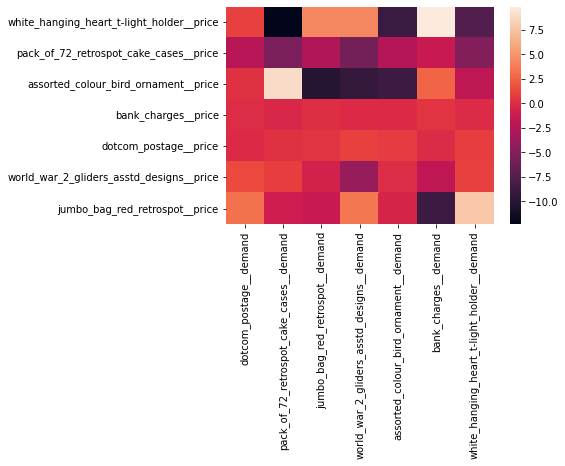

In [ ]:
sns.heatmap(df_priceSensitivity)

In [ ]:
df_priceSensitivity=df_priceSensitivity.sort_index(axis=1).sort_index()#.shape
# temp_df=pd.DataFrame((df_priceSensitivity.values+df_priceSensitivity.T.values)/2)# Depends on whether if A is substitue of B then B is substitute of A

In [ ]:
# dict_betas

In [ ]:
# df_priceSensitivity.T > 
df_priceSensitivity.T.apply(np.quantile,q=0.9,axis=1)

df_priceSensitivity.T.apply(lambda x: (x>np.quantile(x,q=0.75)) & x>0
,axis=1)

,assorted_colour_bird_ornament__price,bank_charges__price,dotcom_postage__price,jumbo_bag_red_retrospot__price,pack_of_72_retrospot_cake_cases__price,white_hanging_heart_t-light_holder__price,world_war_2_gliders_asstd_designs__price
assorted_colour_bird_ornament__demand,False,False,True,False,False,False,True
bank_charges__demand,True,False,False,False,False,True,False
dotcom_postage__demand,False,False,False,True,False,False,True
jumbo_bag_red_retrospot__demand,False,False,True,False,False,True,False
pack_of_72_retrospot_cake_cases__demand,True,False,False,False,False,False,True
white_hanging_heart_t-light_holder__demand,False,False,False,True,False,False,True
world_war_2_gliders_asstd_designs__demand,False,False,False,True,False,True,False


# ROUGH WORK

In [ ]:
# # !mkdir '/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data'
# # !unzip '/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/archive.zip' -d '/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data/'
# # pd.read_csv('/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data/data.csv')
# import os
# import sys
# sys.path.append('/content/drive/MyDrive/Demand_Analytics/ProvisionalDataset/data')




In [ ]:
cols_tbu=[i.lower() for i in pd.read_csv('data.csv',nrows=0).columns]
# cols_tbu


In [ ]:
#Actually there is one particular row that is not delimited properly
#We intend to detremine that row but cannot read csv file in stream

### IGNORE Encoding latin mei thi


df=pd.DataFrame(columns=cols_tbu)
ii=0
increment_step=10000
stop_ii=6000000

# stop_date=pd.to_datetime('12/18/2010')
stop_date=pd.to_datetime('01/01/2011')

latest_date=pd.to_datetime('01/01/2010')

skipped_thousand=[]

# while ii<stop_ii:
while latest_date<= stop_date:
  # print(ii,latest_date)
  increment_step=min(500,increment_step)
  try:
    temp_df=pd.read_csv('data.csv',
                        skiprows=ii,nrows=increment_step,
                        header=None,encoding='latin1')
    temp_df.columns=cols_tbu
    temp_df.loc[:,'invoicedate']=pd.to_datetime(temp_df.invoicedate)

    df=pd.concat([df,temp_df])
    latest_date=df.invoicedate.max()

  except:
    skipped_thousand.append(ii)
    # increment_step+=500
    
    pass
  ii+=increment_step


 
df.reset_index(drop=True,inplace=True)
df.drop(0,inplace=True)

 

In [ ]:
len(skipped_thousand)
ii

42500

In [ ]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
1,536409,72802C,VANILLA SCENT CANDLE JEWELLED BOX,1,2010-12-01 11:45:00,4.25,17908.0,United Kingdom
2,536409,22109,FULL ENGLISH BREAKFAST PLATE,1,2010-12-01 11:45:00,3.75,17908.0,United Kingdom
3,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
4,536409,22531,MAGIC DRAWING SLATE CIRCUS PARADE,1,2010-12-01 11:45:00,0.42,17908.0,United Kingdom
5,536409,21811,CHRISTMAS HANGING HEART WITH BELL,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
41995,539993,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,2011-01-04 10:00:00,2.95,13313.0,United Kingdom
41996,539993,22808,SET OF 6 T-LIGHTS EASTER CHICKS,12,2011-01-04 10:00:00,2.95,13313.0,United Kingdom
41997,539993,22458,CAST IRON HOOK GARDEN FORK,8,2011-01-04 10:00:00,2.55,13313.0,United Kingdom
41998,539993,22862,LOVE HEART NAPKIN BOX,4,2011-01-04 10:00:00,4.25,13313.0,United Kingdom


In [ ]:
pd.to_datetime(df.invoicedate).max()< pd.to_datetime('01/01/2011')

True

In [ ]:
df.invoicedatedt.month #< '01/01/2010'

AttributeError: ignored

In [ ]:
df=pd.read_csv('data.csv',nrows=30000)

df.columns=[i.lower() for i in df.columns]
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
29995,538839,21874,GIN AND TONIC MUG,1,12/14/2010 13:10,1.25,14606.0,United Kingdom
29996,538839,21934,SKULL SHOULDER BAG,2,12/14/2010 13:10,1.65,14606.0,United Kingdom
29997,538839,22299,PIG KEYRING WITH LIGHT & SOUND,1,12/14/2010 13:10,1.25,14606.0,United Kingdom
29998,538839,82486,WOOD S/3 CABINET ANT WHITE FINISH,1,12/14/2010 13:10,7.95,14606.0,United Kingdom


In [ ]:
df.description.str.lower().value_counts()

white hanging heart t-light holder     170
paper chain kit 50's christmas         148
regency cakestand 3 tier               121
red woolly hottie white heart.         119
hand warmer bird design                112
                                      ... 
chunky cracked glaze necklace ivory      1
fire polished glass bracelet black       1
4 gold flock christmas balls             1
green  diamante pen in gift box          1
jam jar with blue lid                    1
Name: description, Length: 2588, dtype: int64

In [ ]:
df.invoicedate#.max()

0             InvoiceDate
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
29995    12/14/2010 13:10
29996    12/14/2010 13:10
29997    12/14/2010 13:10
29998    12/14/2010 13:10
29999    12/14/2010 13:10
Name: invoicedate, Length: 30000, dtype: object

In [ ]:
pd.read_csv('data.csv',
                        skiprows=11,nrows=100,
            header=None)

,0,1,2,3,4,5,6,7
0,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,12/1/2010 8:34,2.10,13047,United Kingdom
1,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,12/1/2010 8:34,2.10,13047,United Kingdom
2,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,12/1/2010 8:34,3.75,13047,United Kingdom
3,536367,22310,IVORY KNITTED MUG COSY,6,12/1/2010 8:34,1.65,13047,United Kingdom
4,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,12/1/2010 8:34,4.25,13047,United Kingdom
...,...,...,...,...,...,...,...,...
95,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809,United Kingdom
96,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,12/1/2010 9:41,4.25,15311,United Kingdom
97,536381,84854,GIRLY PINK TOOL SET,5,12/1/2010 9:41,4.95,15311,United Kingdom
98,536381,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,12/1/2010 9:41,1.95,15311,United Kingdom


In [ ]:
# df=pd.DataFrame()
# for df_temp in pd.read_csv('data.csv',nrows=50000,chunksize=1000,iterator=True):
#   try:
#     df_temp.loc[:,'chunk']=ii
#     ii+=1
#     df=pd.concat([df,df_temp])
#   except:
#     pass

In [ ]:
df

""


In [ ]:
# pd.read_csv('data.csv',
#                         skiprows=50000,nrows=100,encoding='latin1',
#                         header=None)

df=pd.read_csv('data.csv', header=None,encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7
0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541906,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.1,12680.0,France
541907,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.stockcode.str.lower().value_counts()#.describe()
df.description.str.lower().value_counts()

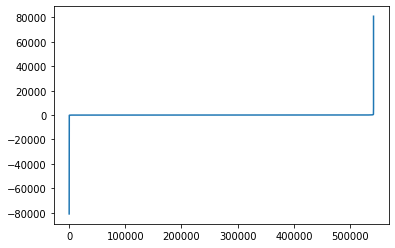

In [ ]:
# df.loc[:,'quantity'].sort_values().reset_index(drop=True).plot()
# df.loc[:,'unitprice'].abs()

In [ ]:
pd.DataFrame({
    'A':{'a':1,'b':2},
    'B':{'a':10,'b':20}
})

# Reference

In [ ]:
# https://www.kaggle.com/datasets/carrie1/ecommerce-data
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html